# Summary

This notebook studies SI model in three aspects:

* In Part One, I study the __Deterministic SI Model__ with theoretical analysis and numerical analysis;

* In Part Two, I study the __Stochastic SI Model__ with numerical analysis;

* In Part Three, Stochastic SI Model on Barabási–Albert network and Erdős–Rényi–Gilbert network


In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from itertools import combinations
from scipy.sparse import csr_matrix
from random import random


# SI Model

* The simplest epidemiological model one can consider is the ___susceptible–infected (SI) model___, in which only two discrete states exist: 

1. __Susceptibles__ (denoted by S) who denote the individuals that who can contract the infection

1. __Infectious__ (denoted by I) who contracted the infection and are contagious

<div>
<img src="./img/SI.png" width="600"/>
</div>


* The probability that an individual acquires the infection from any given neighbor in an infinitesimal time interval $dt$ is $\beta dt$, where $\beta$ defines the pathogen ___spreading rate___ (aka transmission rate)

* In this simple model, individuals that enter the infected class remain permanently infectiousi.e. the epidemics can only grow 

* In this context, we are also assuming ___homogeneous mixing___, i.e. we assume that each individual has the same chance of coming into contact with an infected individual. This hypothesis eliminates the need to know the precise contact network on which the disease spreads, replacing it with the assumption that anyone can infect anyone else. In other words, each individual within a specific compartment is identical and homogeneously mixed with the rest of the population


# Part One: Deterministic SI Model


* We can write the temporal dynamics of this model

$$
\begin{align*}
S(t+dt) \; =& \; S(t) - \beta I(t)\frac{S(t)}{N}dt \\
I(t+dt) \; =& \; I(t) + \beta I(t)\frac{S(t)}{N}dt \\
\end{align*}
$$

where $N$ denotes the total population of individuals

* $\frac{S(t)}{N}$ is the probability of meeting a susceptible individual per unit of time

* $\frac{I(t)S(t)}{N}$ is the average number of susceptibles that infected individuals meet per unit of time

* $\frac{\beta I(t) S(t)}{N}$ is the average number of susceptibles that become infected per unit of time

* We can also define another quantity, the so-called ___force of infection___ $\lambda$, which is the the _per capita_ rate at which susceptible individuals contract the infection, i.e. the rate at which new infectious people are produced.

   $$\lambda = \frac{\beta I}{N}$$

* If we take the limit of the previous set of equations for $dt \rightarrow 0$ we get that:

$$
\begin{align*}
\frac{dS(t)}{dt} \; =& \; -\beta \frac{ I(t)S(t)}{N} \\
\frac{dI(t)}{dt} \; =& \;   \beta\frac{I(t)S(t)}{N} \\
\end{align*}
$$

where $N$ denotes the total population of individuals

* However, normally it is convenient to re-define the variables as fractions with respect to the total population (since that is constant). Therefore, the equations become:

$$
\begin{align*}
\frac{ds(t)}{dt} \; =& \; -\beta  i(t)s(t) \\
\frac{di(t)}{dt} \; =& \;   \beta i(t)s(t) \\
\end{align*}
$$

where $s(t) = S(t)/N$ and $i(t) = I(t)/N$. 

* Also, since we are assuming that the population is constant over time (i.e. no births or deaths), we can further simplify the system to just one equation using the fact that: $$i(t)+s(t) = 1 $$

$$\frac{di(t)}{dt}  =   \beta  i(t)(1-i(t)) $$


* This can be solved from:

$$\frac{di}{i(1-i)}  =    \beta  dt $$


$$\int\frac{1}{i(1-i)}di  = \int  \beta \; dt $$


$$\log\left(\frac{i}{1-i}\right)  =  \beta t + C $$


$$\frac{i}{1-i}  =  e^{\beta t + C}  $$


$$\frac{i}{1-i}  =  e^{\beta t} K  $$


$$i  =  (1-i)e^{\beta t} K  $$


$$i(1+Ke^{\beta t})  =  Ke^{\beta t}   $$


$$i  =  \frac{Ke^{\beta t}}{1+Ke^{\beta t}}   $$


And since:

$$ K = \frac{i_0}{1-i_0} $$

The solution is:

$$i  =  \frac{i_0e^{\beta t}}{1-i_0+i_0e^{\beta t}}   $$


* This equation is also called _logistic growth equation_

In [2]:
def si_deterministic(N,I0,beta,T):
    S = np.zeros(T+1)
    I = np.zeros(T+1)

    S[0] = N-I0
    I[0] = I0

    for t in range(1,T+1):
        S[t] = S[t-1] - beta*I[t-1]/N*S[t-1]
        I[t] = I[t-1] + beta*S[t-1]*I[t-1]/N
    
    return S,I


Text(0, 0.5, 'Number of individuals')

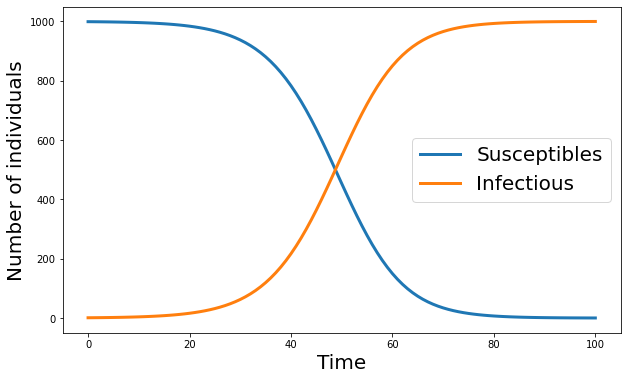

In [3]:
N = 1000
I0 = 1
beta = 0.15
T = 100
S,I = si_deterministic(N,I0,beta,T)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(S, label='Susceptibles',lw=3)
ax.plot(I, label='Infectious', lw=3)
ax.legend(fontsize=20)
ax.set_xlabel('Time', fontsize=20)
ax.set_ylabel('Number of individuals', fontsize=20)

### The effect of  $\beta$  change

Text(0, 0.5, 'Number of individuals')

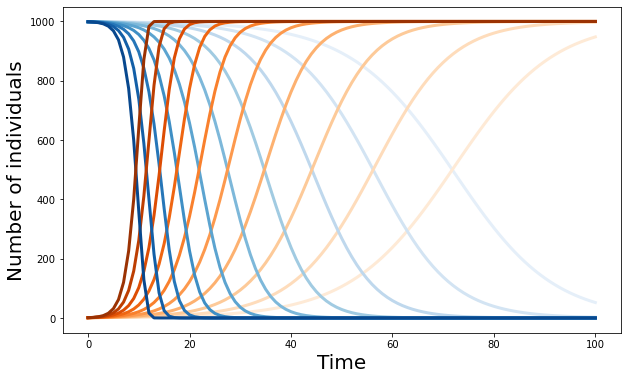

In [4]:
N = 1000
I0 = 1
T = 100

betas = np.logspace(np.log(1e-1),0,10, base=np.e)#np.logspace(0,1,10, base=np.e)
n_colors = len(betas)

I_colors = sns.color_palette('Oranges',n_colors=n_colors)
S_colors = sns.color_palette('Blues',n_colors=n_colors)

fig, ax = plt.subplots(figsize=(10,6))

for k, beta in enumerate(betas):
    S,I = si_deterministic(N,I0,beta,T)
    ax.plot(S, label='Susceptibles',lw=3, color=S_colors[k])
    ax.plot(I, label='Infectious', lw=3, color=I_colors[k])
ax.set_xlabel('Time', fontsize=20)
ax.set_ylabel('Number of individuals', fontsize=20)

Text(0, 0.5, 'Time to S=0')

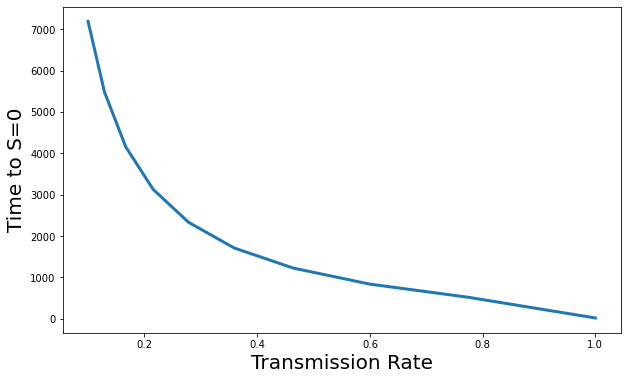

In [5]:
N = 1000
I0 = 1
T = int(1e5)

betas = np.logspace(np.log(1e-1),0,10, base=np.e)
n_colors = len(betas)

I_colors = sns.color_palette('Oranges',n_colors=n_colors)
S_colors = sns.color_palette('Blues',n_colors=n_colors)

fig, ax = plt.subplots(figsize=(10,6))

S_eq = []
for k, beta in enumerate(betas):
    S,I = si_deterministic(N,I0,beta,T)
    S_eq.append(np.argmin(S))

ax.plot(betas, S_eq, lw=3)
ax.set_xlabel('Transmission Rate', fontsize=20)
ax.set_ylabel('Time to S=0', fontsize=20)

# Part Two: Stochastic SI Model

In [6]:
def si_stochastic(N, I0, beta, T, num_replications):
    S = np.zeros((T+1,num_replications))
    I = np.zeros((T+1,num_replications))

    S[0,:] = N-I0
    I[0,:] = I0

    for b in range(num_replications):
        for t in range(1,T+1):
            p = beta*I[t-1,b]/N # force of infection
            new_infected = np.random.binomial(S[t-1,b],p)
            S[t,b] = S[t-1,b] - new_infected
            I[t,b] = I[t-1,b] + new_infected
    
    return S,I


In [7]:
N = 1000
I0 = 1
beta = 0.15
T = 100
B = 200

S,I = si_stochastic(N,I0,beta,T,B)

Text(0, 0.5, 'Number of individuals')

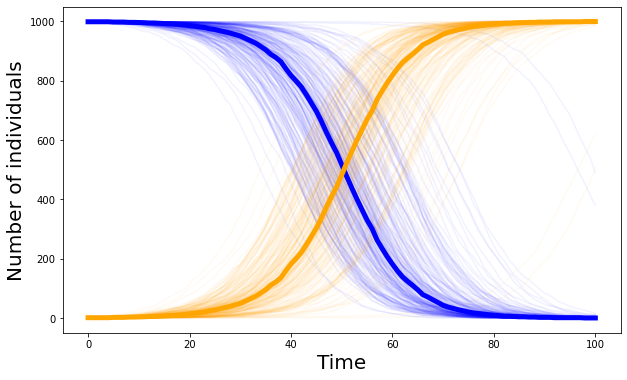

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(S, color='blue', alpha=0.05)
ax.plot(I, color='orange', alpha=0.05)
ax.plot(np.median(S,axis=1), lw=5, color='blue')
ax.plot(np.median(I,axis=1), lw=5, color='orange')

ax.set_xlabel('Time', fontsize=20)
ax.set_ylabel('Number of individuals', fontsize=20)

# Part Three: Stochastic SI Model on Barabási–Albert network and Erdős–Rényi–Gilbert network

In [9]:
def generate_ba(N, m, m0=2):    
    if m>m0:
        raise NameError('Error! m cannot be larger than m0!')
    
    degrees = np.zeros((N,))
    nodes = np.arange(N)
    edges = []
    
    init_nodes = list(range(m0))
    edges += list(combinations(init_nodes,2))
    degrees[init_nodes] = m0-1.0
        
    Nt = m0
    
    while Nt<N:
        target_nodes = np.random.choice(nodes[:Nt],size=m,replace=False,p=degrees[:Nt]/degrees[:Nt].sum())
        edges += list(zip([Nt]*m,target_nodes))
        degrees[target_nodes] += 1
        degrees[Nt] += m
        Nt+=1

    nodes_i,nodes_j = zip(*edges)
    ones = np.ones(len(nodes_i)*2,dtype=int)
    
    A = csr_matrix((ones,(nodes_i+nodes_j,nodes_j+nodes_i)), shape=(N,N))
    
    return A


def generate_gilbert(N, p, implementation=1):
    if implementation == 0:
        A = np.zeros((N,N))
        for row in xrange(N):
            for col in xrange(row+1,N):
                if random()<p:
                    A[row,col] = 1
                    A[col,row] = 1
    elif implementation == 1: 
        A = np.zeros((N,N))
        L = N*(N-1)//2
        rands = np.random.rand(L)
        rows, cols = np.triu_indices(n=N,m=N,k=1)
        A[rows,cols] = rands<p
        A[cols,rows] = rands<p
    elif implementation == 2:
        A = np.zeros((N,N))
        L_list = combinations(range(N),2)
        edges = [edge for edge in L_list if random()<p]
        if edges:
            rows,cols = zip(*edges)
            A[rows,cols] = 1 
            A[cols,rows] = 1 
    return csr_matrix(A)


def si_network(A,I0,beta,T):
    N = A.shape[0]
    S = np.zeros(T+1)
    I = np.zeros(T+1)

    S[0] = N-I0
    I[0] = I0   
    
    node_status = {node : {'current_status':'S', 'next_status':None} for node in range(N)}
    init_infected = np.random.permutation(N)[:I0]
    for node in init_infected:
        node_status[node]['current_status'] = 'I'
        
    for t in range(1,T+1):
        S[t] = S[t-1]
        I[t] = I[t-1]
        for node in range(N):
            if node_status[node]['current_status'] == 'S':
                for neigh in A[node].indices:
                    if node_status[neigh]['current_status']=='I':
                        if np.random.rand() < beta:
                            node_status[node]['next_status'] = 'I'
                            S[t] -=1
                            I[t] += 1
                            break
        for node in range(N):
            if node_status[node]['next_status']:
                node_status[node]['current_status'] = node_status[node]['next_status']
                node_status[node]['next_status'] = None

    return S,I

### Stochastic SI Model on Barabási–Albert network

Text(0, 0.5, 'Number of individuals')

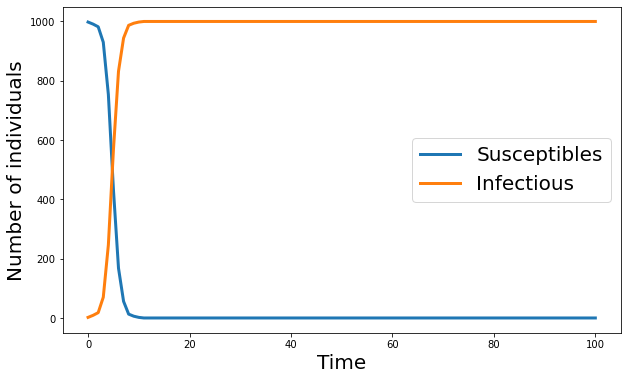

In [10]:
N = 1000
A_ba = generate_ba(N,2)
I0 = 2
T = 100
beta = 0.5

S_ba,I_ba = si_network(A_ba,I0,beta,T)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(S_ba, label='Susceptibles',lw=3)
ax.plot(I_ba, label='Infectious', lw=3)
ax.legend(fontsize=20)
ax.set_xlabel('Time', fontsize=20)
ax.set_ylabel('Number of individuals', fontsize=20)

### Stochastic SI Model on Erdős–Rényi–Gilbert network

Text(0, 0.5, 'Number of individuals')

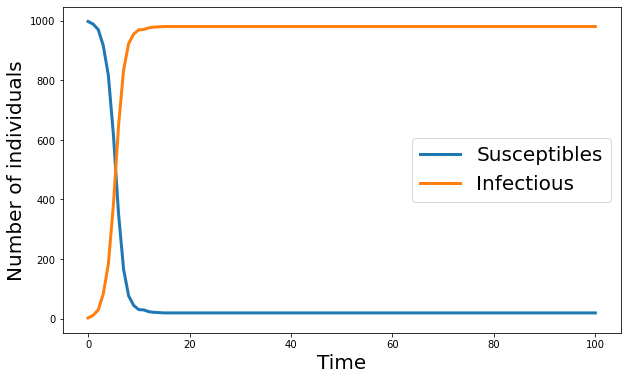

In [11]:
avg_k_ba = np.asarray(A_ba.sum(axis=0)).reshape(-1).mean()
p = avg_k_ba/(N-1)
A_er = generate_gilbert(N,p)

S_er,I_er = si_network(A_er,I0,beta,T)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(S_er, label='Susceptibles',lw=3)
ax.plot(I_er, label='Infectious', lw=3)
ax.legend(fontsize=20)
ax.set_xlabel('Time', fontsize=20)
ax.set_ylabel('Number of individuals', fontsize=20)

Text(0, 0.5, 'Number of individuals')

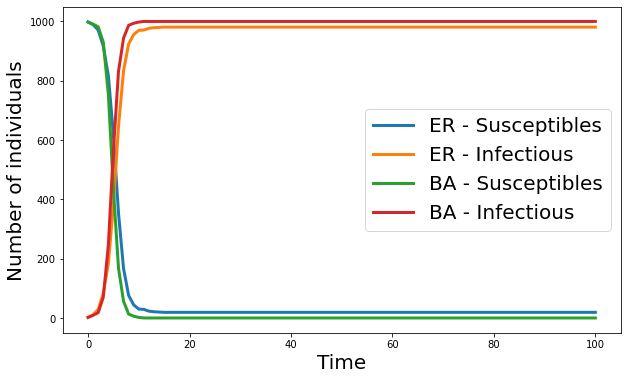

In [12]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(S_er, label='ER - Susceptibles',lw=3)
ax.plot(I_er, label='ER - Infectious', lw=3)
ax.plot(S_ba, label='BA - Susceptibles',lw=3)
ax.plot(I_ba, label='BA - Infectious', lw=3)
ax.legend(fontsize=20)
ax.set_xlabel('Time', fontsize=20)
ax.set_ylabel('Number of individuals', fontsize=20)